In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
## models
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
data = pd.read_csv("winequality-red.csv", sep = ";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
693,9.0,0.480,0.32,2.8,0.084,21.0,122.0,0.99840,3.32,0.62,9.4,5
553,5.0,1.040,0.24,1.6,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
720,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6,5
843,7.1,0.685,0.35,2.0,0.088,9.0,92.0,0.99630,3.28,0.62,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

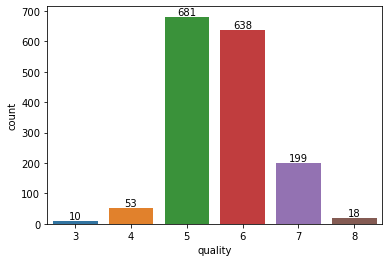

In [7]:
ax = sbn.countplot(x = data["quality"])
ax.bar_label(ax.containers[0]);

In [8]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [9]:
data.corr()["quality"]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [10]:
y = data["quality"]
x = data.drop("quality", axis = 1)

In [11]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [12]:
def classification(x, y):
    g = GaussianNB()
    b = BernoulliNB()
    dt = DecisionTreeClassifier(criterion = "gini")   # "gini", "entropy", "log_loss"
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    kn = KNeighborsClassifier()
    sv = SVC(kernel = "rbf")   # 'linear', 'poly', 'rbf', 'sigmoid'
    
    models = [g, b, dt, rf, gb, kn, sv]
    model_names = ["Gaussian", "Bernoulli", "Decision_Tree", "Random_Forest", "Gradient_Boost", "KNN", "Support_Vector"]
    
    sonuc_df = pd.DataFrame(columns = ["Accuracy_Score"], index = model_names)
    acc = []
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.3, random_state = 42)
    scale1 = StandardScaler()
    scale2 = MinMaxScaler()
    x_train = scale1.fit_transform(x_train)
    x_test = scale1.fit_transform(x_test)
    ## x_train = scale2.fit_transform(x_train)
    ## x_test = scale2.fit_transform(x_test)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc.append(accuracy_score(y_true, y_pred))
        
    sonuc_df["Accuracy_Score"] = acc
    return sonuc_df.sort_values("Accuracy_Score", ascending = False)

In [13]:
classification(x, y)

,Accuracy_Score
Random_Forest,0.641667
Gradient_Boost,0.606250
Support_Vector,0.597917
KNN,0.566667
Bernoulli,0.560417
Decision_Tree,0.545833
Gaussian,0.537500


In [15]:
## i want to best score for Decision tree so;(nothing changed)
max_value = 0
count = 1
liste = []
    
for i in range(1,10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
    new_model2 = KNeighborsClassifier(n_neighbors = i)
    new_model2.fit(x_train, y_train)
    score = new_model2.score(x_test, y_test) * 100
    print(f"for random_state {j} :  score : {new_model2.score(x_test, y_test) * 100}")
    liste.append(score)

for random_state 1 :  score : 52.5
for random_state 1 :  score : 43.75
for random_state 1 :  score : 44.79166666666667
for random_state 1 :  score : 47.083333333333336
for random_state 1 :  score : 48.541666666666664
for random_state 1 :  score : 48.125
for random_state 1 :  score : 47.708333333333336
for random_state 1 :  score : 48.95833333333333
for random_state 1 :  score : 48.95833333333333


In [16]:
liste

[52.5,
 43.75,
 44.79166666666667,
 47.083333333333336,
 48.541666666666664,
 48.125,
 47.708333333333336,
 48.95833333333333,
 48.95833333333333]

## ilk dataset için başarı oranımız çok kötü şimdi ikincisi için deneyeceğim.

In [17]:
data2 = pd.read_csv("winequality-white.csv", sep = ";")
data2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
data2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
y2 = data2["quality"]
x2 = data2.drop("quality", axis = 1)

In [20]:
classification(x2, y2)

,Accuracy_Score
Random_Forest,0.677551
Support_Vector,0.566667
Gradient_Boost,0.559864
KNN,0.551020
Decision_Tree,0.538095
Bernoulli,0.450340
Gaussian,0.419728


## Başarı oranları çok kötü bu sefer

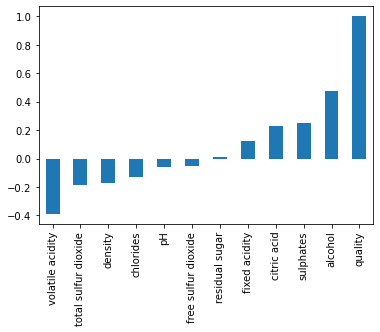

In [23]:
data.corr()["quality"].sort_values().plot(kind = "bar");

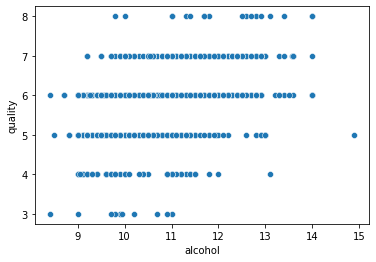

In [25]:
sbn.scatterplot(x = "alcohol", y = "quality", data = data);

In [26]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [28]:
Q1 = data.alcohol.quantile(0.25)
Q1

9.5

In [30]:
Q3 = data.alcohol.quantile(0.75)
Q3

11.1

In [31]:
IQR = Q3 - Q1
IQR

1.5999999999999996

In [32]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [33]:
data = data[(data.alcohol < upper_limit) | (data.alcohol > lower_limit)]

In [34]:
y1 = data["quality"]
x1 = data.drop("quality", axis = 1)

In [35]:
classification(x1, y1)

,Accuracy_Score
Random_Forest,0.639583
Support_Vector,0.597917
Gradient_Boost,0.593750
KNN,0.566667
Decision_Tree,0.562500
Bernoulli,0.560417
Gaussian,0.537500


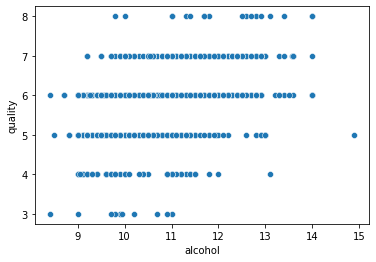

In [36]:
sbn.scatterplot(x = "alcohol", y = "quality", data = data);

In [37]:
data.describe()[1:].style.background_gradient()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [39]:
data.nunique().sort_values(ascending = False)

density                 436
chlorides               153
total sulfur dioxide    144
volatile acidity        143
fixed acidity            96
sulphates                96
residual sugar           91
pH                       89
citric acid              80
alcohol                  65
free sulfur dioxide      60
quality                   6
dtype: int64